# Real Estate Sales Data Analysis
### King County, Washington State, USA

<p style="text-align:center">
    <img src="https://wahospitality.org/wp-content/uploads/2023/06/KingCountyHomepage-958-%C3%97-558-px.png" width="500" alt="King County, WA" align="left">
    </a>
</p>

## Dataset Description

This dataset comprises real estate sales prices and related metrics for King County, WA. Dates range from 2014 to 2015.


| Variable      | Description                                |
| ------------- | ------------------------------------------ |
| id            | House identification number                |
| date          | Date of sale                               |
| price         | Sale price (prediction target variable)    |
| bedrooms      | Number of bedrooms                         |
| bathrooms     | Number of bathrooms                        |
| sqft_living   | Square footage of the home                 |
| sqft_living15 | Square footage of the home in 2015         |
| sqft_lot      | Square footage of the lot                  |
| floors        | Total floors (levels) in house             |
| waterfront    | House with waterfront view                 |
| view          | Has been viewed                            |
| condition     | Overall dwelling condition                 |
| grade         | House grade (King County grading system)   |
| sqft_above    | Square footage of the house above ground   |
| sqft_basement | Square footage of the basement             |
| yr_built      | Year built                                 |
| yr_renovated  | Year of house renovation                   |
| zipcode       | Zip code                                   |
| lat           | Latitude coordinate                        |
| long          | Longitude coordinate                       |




## Libraries
To begin, I import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Reading Dataset

Next, I read in the dataset .csv file to a Pandas data frame with the `read_csv()` method

In [2]:
data = pd.read_csv("realestate_salesdata.csv", index_col=0)

Displaying the leading 5 rows of the data frame with the `head()` method:

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_living15,sqft_lot,sqft_lot15,floors,...,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900,3.0,1.00,1180,1340,5650,5650,1.0,...,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000,3.0,2.25,2570,1690,7242,7639,2.0,...,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000,2.0,1.00,770,2720,10000,8062,1.0,...,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000,4.0,3.00,1960,1360,5000,5000,1.0,...,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000,3.0,2.00,1680,1800,8080,7503,1.0,...,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


## Summary Statistics

I am interested in getting an overview of the dataset. Firstly, I will look at the data types of each column using the Pandas `dtypes` property


In [4]:
data.dtypes

id                 int64
date              object
price              int64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_living15      int64
sqft_lot           int64
sqft_lot15         int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
dtype: object

I use the Pandas `describe()` method to return summary statistics of each numerical column. 

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_living15,sqft_lot,sqft_lot15,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1986.552492,1.510697e+04,12768.455652,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896
std,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,685.391304,4.142051e+04,27304.179631,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828
min,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,399.000000,5.200000e+02,651.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,1490.000000,5.040000e+03,5100.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,1840.000000,7.618000e+03,7620.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,2360.000000,1.068800e+04,10083.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,6210.000000,1.651359e+06,871200.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


## Data Wrangling


Now I want to clean up the dataset. I begin by dropping the **"id"** column using the `.drop()` method as it is unnexassary for data analysis.


In [6]:
data.drop(columns=["id"], axis = 1, inplace = True)

Checking for missing (NaN) values using `isnull().sum()`:


In [7]:
data.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_living15     0
sqft_lot          0
sqft_lot15        0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
dtype: int64

Since the **"bedrooms"** and **"bathrooms"** columns are missing entries, we perform imputation to replace the NaN values with the column means. To do this, we use the `.fillna()` and `.mean()` methods, then check again for NaN values to verify the imputation success.

In [8]:
data['bedrooms'] = data['bedrooms'].fillna(data['bedrooms'].mean())
data['bathrooms'] = data['bathrooms'].fillna(data['bathrooms'].mean())

data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_living15    0
sqft_lot         0
sqft_lot15       0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

## Exploratory Data Analysis


#### Determining the total count of houses with each unique number of floors.

In [9]:
pd.DataFrame(data['floors'].value_counts()).reset_index()

,floors,count
0,1.0,10680
1,2.0,8241
2,1.5,1910
3,3.0,613
4,2.5,161
5,3.5,8


For houses with an integer number of floors, houses with a greater number of floors are less common. The same is seen for houses with non-integer numbers of floors. Note: a half-floor indicates a floor (typically upper) that is considerably smaller than the other, main floor(s).

#### Determining whether houses with or without a waterfront view have a greater number of price outliers.
Plotting a box plot with the Seaborn `boxplot()` function:

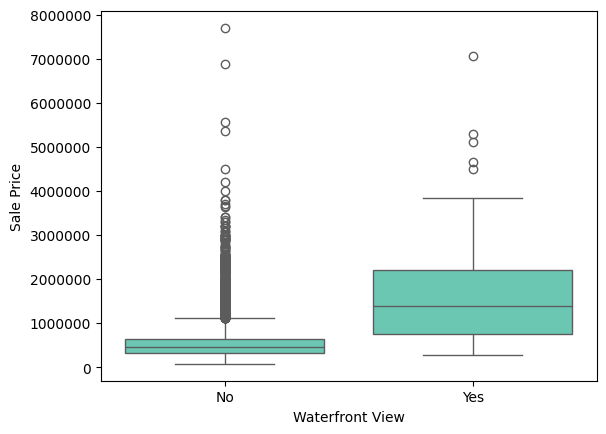

In [10]:
box = sns.boxplot(x="waterfront", y="price", data=data, color = "#5cd6ba")
box.set(xlabel='Waterfront View', ylabel='Sale Price', xticks = [0,1], xticklabels = (['No', 'Yes']));
plt.ticklabel_format(style='plain', axis='y')

As evident in the box plot above, houses without a waterfront view have a greater number of price outliers. The median sale price is ~$500,000 for dwellings without a waterfront view, and ~$1,500,000 for those with a waterfront view. 

#### Determining the direction of correlation between **"sqft_above"** and price.
Plotting a scatter plot with the Seaborn `regplot()` function:

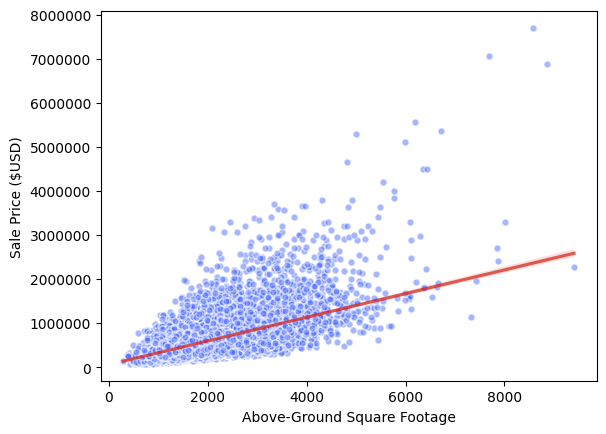

In [11]:
scatter = sns.regplot(
    x="sqft_above",
    y="price",
    data=data,
    color="#4d6dff",
    scatter_kws={"s": 25, "alpha": 0.5, "edgecolors": "white"},
    line_kws={"alpha":0.7, "color":'#d61e11'}
)
scatter.set(xlabel="Above-Ground Square Footage", ylabel="Sale Price ($USD)")
plt.ticklabel_format(style="plain", axis="y")

As the scatter plot shows, the above-ground square footage and sale price appear to be positively correlated.

#### Determining the feature most closely correlated with price.


In [12]:
data.corr(numeric_only=True)['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525738
view             0.397293
sqft_basement    0.323816
bedrooms         0.308797
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

Square footage of the house is most closely correlated with sale price, with a correlation coefficient of 0.702.

## Model Development


To estimate a linear regression model to predict sale price using longitude, I use the `LinearRegression()` function and the longitudinal coordinate **"long"**. The `.score()` method is used to calculate the R-squared value.

In [13]:
X = data[['long']]
Y = data['price']
lm = LinearRegression()
print("R-Squared:", lm.fit(X,Y).score(X,Y))

R-Squared: 0.00046769430149007363


Similarly, to estimate a linear regression model to predict sale price using the square footage of a house, I use the `LinearRegression()` function and the **"sqft_living"** feature. Again, the `.score()` method is used to calculate the R-squared value.

In [14]:
X = data[['sqft_living']]
Y = data['price']
lm = LinearRegression()
lm.fit(X,Y)
print('Predicted values:', lm.predict(data[['sqft_living']]))
print('R-Squared:', lm.score(X, Y))


Predicted values: [287555.06702452 677621.82640197 172499.40418656 ... 242655.29616092
 405416.96554144 242655.29616092]
R-Squared: 0.4928532179037931


Fitting a linear regression model to predict the sale price using the list of features, then calculating the R-squared value. 

In [15]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_above", "grade", "sqft_living", "sqft_living15", "sqft_lot", "sqft_lot15"]     

In [16]:
X = data[features]
y = data['price']
lm = LinearRegression().fit(X, y)
print('Predicted values:', lm.predict(data[features]))
print('R-Squared:', lm.score(X, Y))

Predicted values: [285158.81451117 664348.40392623 308833.9202791  ... 304999.54568942
 430521.79771803 305131.95595333]
R-Squared: 0.6587488268381336


Next, I will make a pipeline object. First, I will make a list of the estimators and their model constructors to be used. 

In [17]:
Input= [('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

Using this list, creating a pipeline object to predict the `price`, fitting the object using the features in the list `features`, and calculating the R-squared.

In [18]:
X = data[features]
Y = data['price']

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe = Pipeline(Input)

pipe.fit(X,Y)
print('R-Squared:', pipe.score(X,Y))

R-Squared: 0.7617598504501368


## Model Evaluation and Refinement


Now I will evaluate the linear regression with a ridge regression object. Firstly, the necessary libraries are imported. 

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

The data is then split into training and testing sets:

In [20]:
X = data[features]
Y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("Test sample count:", x_test.shape[0])
print("Training sample count:",x_train.shape[0])

Test sample count: 3242
Training sample count: 18371


Creating and fitting a Ridge regression object using the training data, then calculating the R-squared value with the test data:

In [21]:
Ridge_test = Ridge(alpha = 0.1)
Ridge_test.fit(x_train, y_train)
print('R-squared:',Ridge_test.score(x_test, y_test))

R-squared: 0.6485625296721061


Finally, I will perform a second order polynomial transform on both data sets, then create and fit another Ridge regression object:

In [22]:
poly = PolynomialFeatures(degree=2)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

Creating another Ridge regression object, this time on the transformed training data. The test data is used to calculate the R-squared.

In [23]:
Ridge_test = Ridge(alpha = 0.1)
Ridge_test.fit(x_train_poly, y_train)
print('R-squared:',Ridge_test.score(x_test_poly, y_test))

R-squared: 0.7237873411826418


After the polynomial transform, the R-squared value increases, suggesting the data is a better fit to a second-order polynomial model rather than the initial linear model. This however, is not conclusive and should not be interpreted as fact. Although the increase in R-squared often indicates an improved fit, the second-order polynomial model may not be the optimal model for sale price prediction. While the Ridge regression method reduces the impact of overfitting and multicollinearity, additional model evaluation techniques with cross-validation can help further confirm whether the increase in R-squared is significant, or due to overfitting.